In [1]:
# Code to wrap output
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# # Change to correct directory
import os
os.chdir("/content/drive/MyDrive")
# !ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
# Import files
df_predictions = pd.read_csv('covid_tweets_cleaned.csv') ### INCLUDE YOUR PREDICTIONS HERE ###

us_states = pd.read_csv('us_state_capitals.csv') 
df_predictions

,date,state,cleaned_tweet,prediction
0,2020-12,Alabama,got the covid vaccine today this is amazing so...,positive
1,2020-12,Alabama,we are protecting the high risk bull shit if t...,positive
2,2020-12,Alabama,im grateful for all of the healthcare workers ...,positive
3,2020-12,Alabama,fomonomo covax pfizer pfizerbiontech pfizercov...,negative
4,2021-01,Alabama,dr funs i feel good my effort at a psa please ...,positive
...,...,...,...,...
6899,2021-03,Wyoming,i was blessed to got my first fauci ouchie get...,positive
6900,2021-03,Wyoming,yes can we put this virus behind us oxfordastr...,negative
6901,2021-03,Wyoming,secondshot tomorrow my mom and i will receive ...,positive
6902,2021-03,Wyoming,just fyi yall can feel bitter towards me nowiv...,positive


In [251]:
# Set no. of rows displayed
pd.set_option("display.max_rows", 10)

# Group by state and date then convert back to DataFrame Object
df_grouped = df_predictions.groupby(["state","date"])["prediction"].value_counts(normalize = True).to_frame(name = 'percentage').reset_index()
df_grouped

,state,date,prediction,percentage
0,Alabama,2020-12,positive,0.750000
1,Alabama,2020-12,negative,0.250000
2,Alabama,2021-01,positive,1.000000
3,Alabama,2021-02,positive,0.636364
4,Alabama,2021-02,negative,0.363636
...,...,...,...,...
328,Wisconsin,2021-03,negative,0.181818
329,Wyoming,2021-02,negative,0.500000
330,Wyoming,2021-02,positive,0.500000
331,Wyoming,2021-03,positive,0.833333


In [252]:
# Cast rows into columns
df_grouped["percent_positive"] = 0
df_grouped["percent_negative"] = 0
df_grouped.loc[df_grouped["prediction"] == "positive", "percent_positive"] = df_grouped.loc[df_grouped["prediction"] == "positive", "percentage"]*100
df_grouped.loc[df_grouped["prediction"] == "negative", "percent_negative"] = df_grouped.loc[df_grouped["prediction"] == "negative", "percentage"]*100
df_grouped = df_grouped.groupby(["state","date"]).sum().reset_index()[["state","date","percent_positive","percent_negative"]]
df_grouped

,state,date,percent_positive,percent_negative
0,Alabama,2020-12,75.000000,25.000000
1,Alabama,2021-01,100.000000,0.000000
2,Alabama,2021-02,63.636364,36.363636
3,Alabama,2021-03,63.888889,36.111111
4,Alaska,2021-01,100.000000,0.000000
...,...,...,...,...
180,Wisconsin,2021-01,33.333333,66.666667
181,Wisconsin,2021-02,77.777778,22.222222
182,Wisconsin,2021-03,81.818182,18.181818
183,Wyoming,2021-02,50.000000,50.000000


In [253]:
# A function to create a 100% Stacked Bar Chart / Filled bar chart
def stacked_bar(state_name):
  df = df_grouped[df_grouped["state"] == state_name]
  df.plot(x = "date", kind = "bar", stacked = True, rot = 0, xlabel = "Date by Year-Month", title = state_name,
          ylabel = "Percentage %", color = {"percent_positive":"green","percent_negative":"red"}).legend(["% Positive","% Negative"], loc='lower right')
  plt.savefig(state_name)
  plt.show()

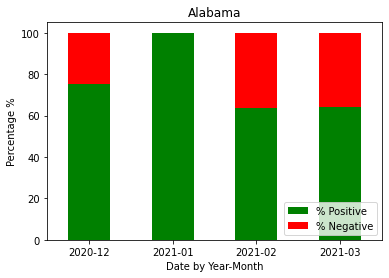

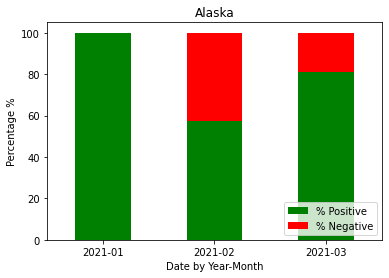

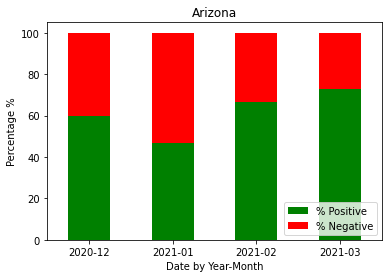

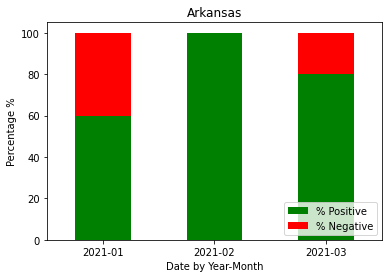

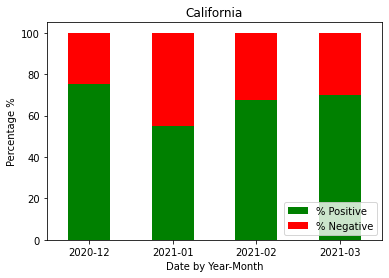

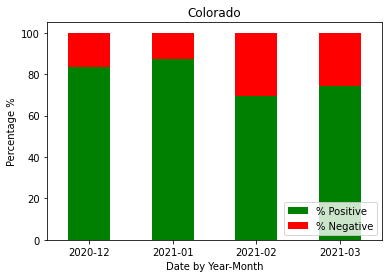

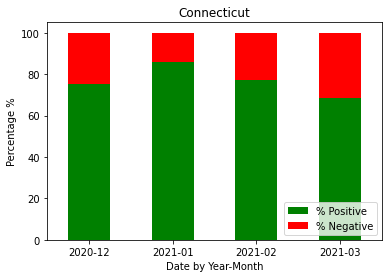

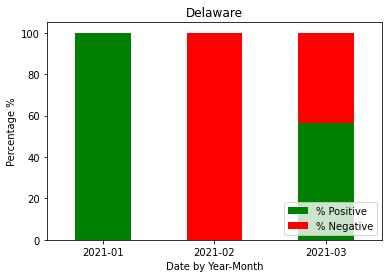

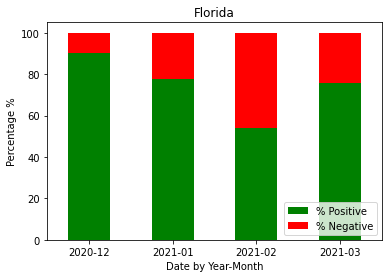

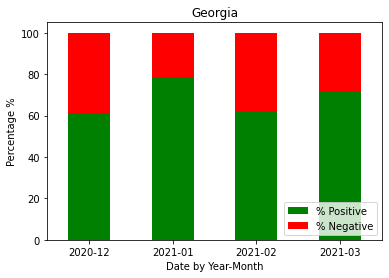

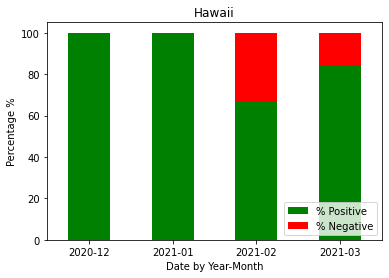

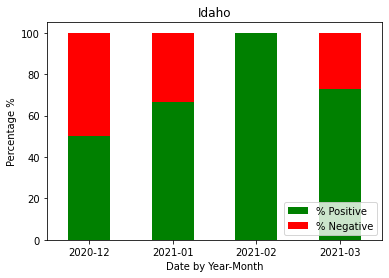

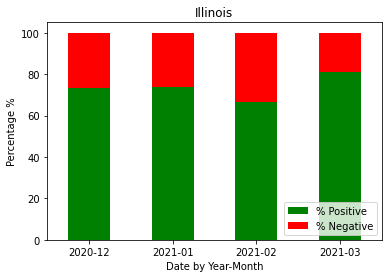

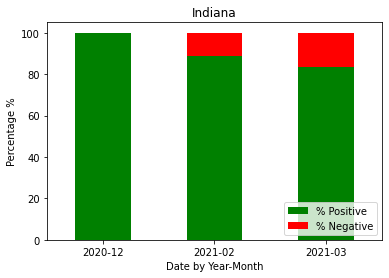

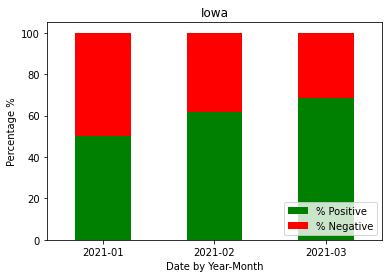

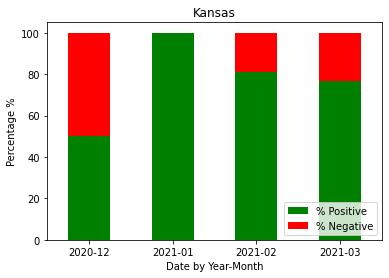

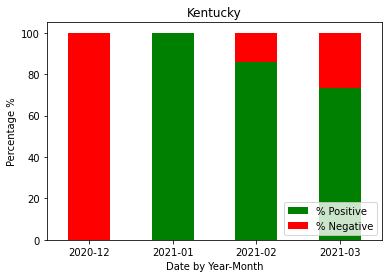

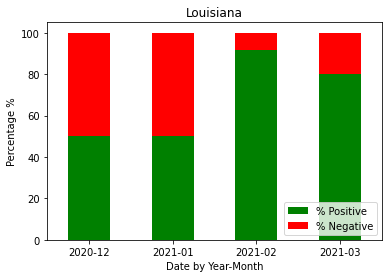

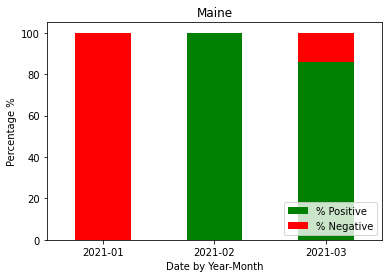

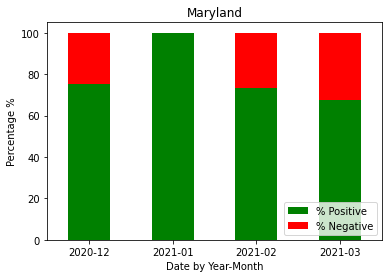

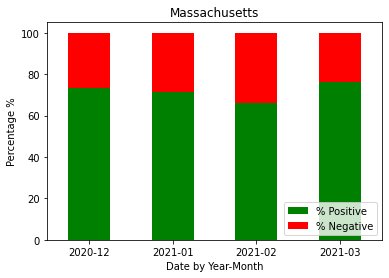

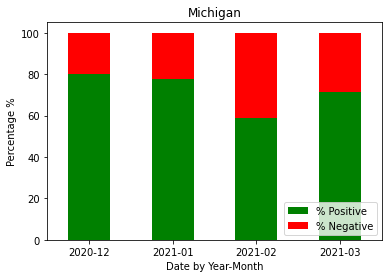

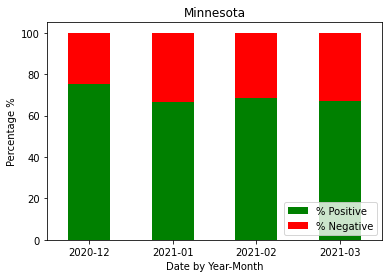

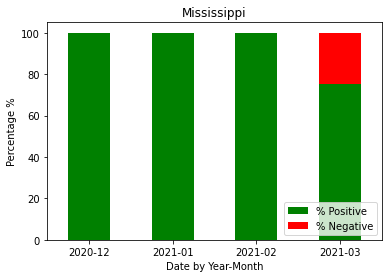

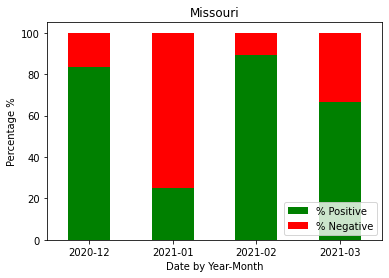

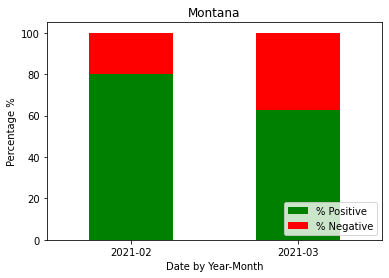

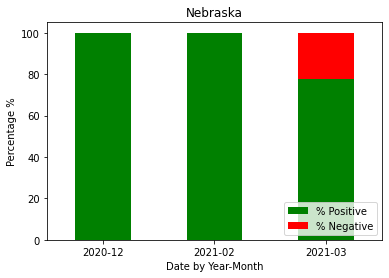

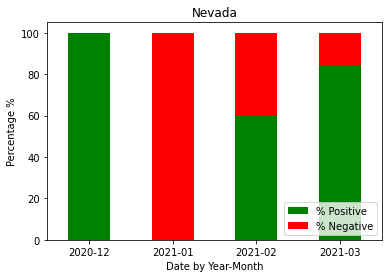

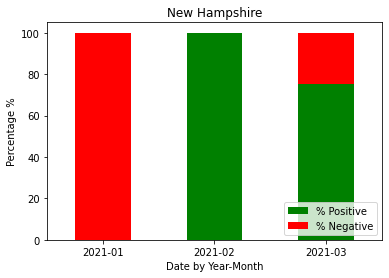

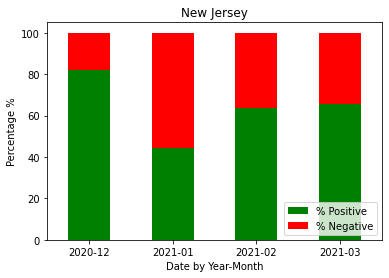

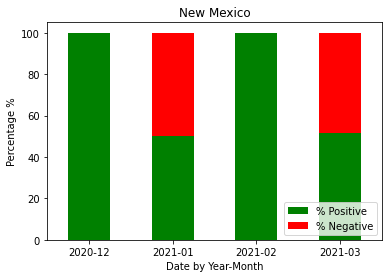

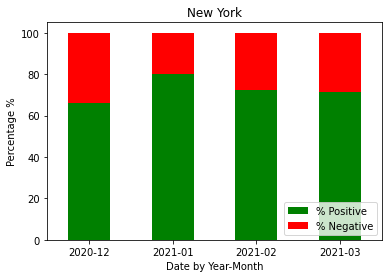

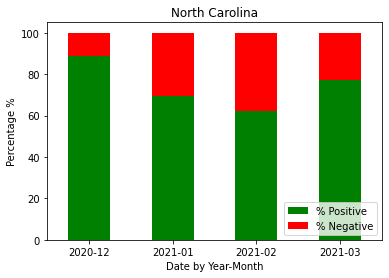

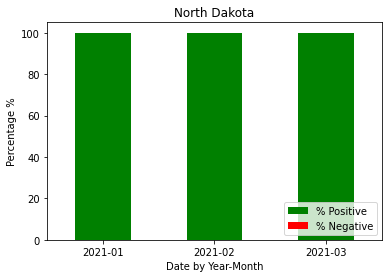

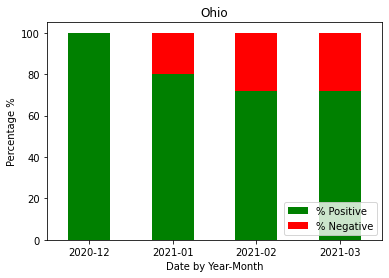

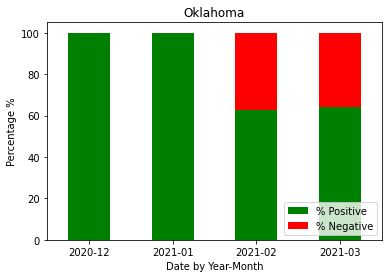

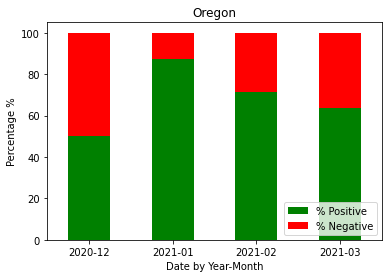

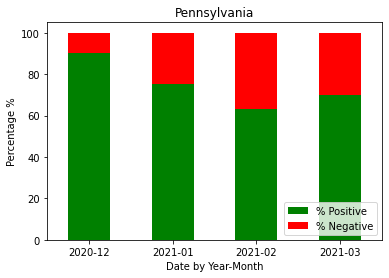

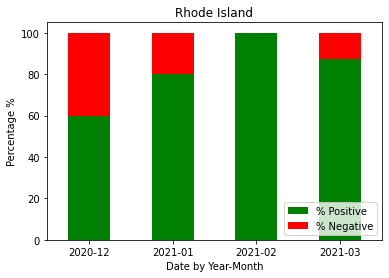

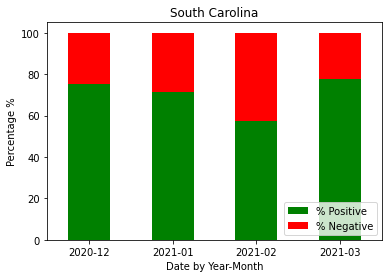

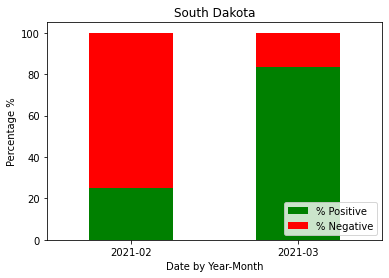

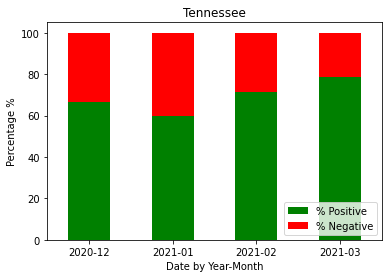

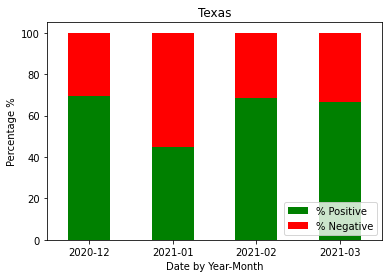

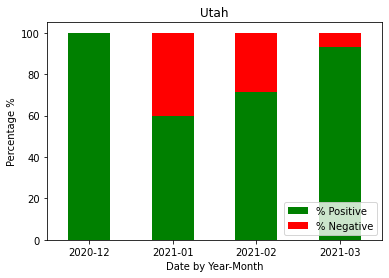

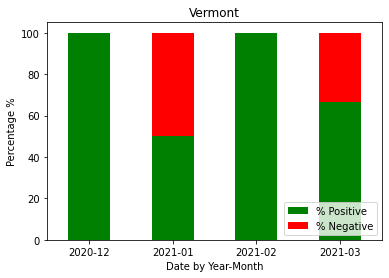

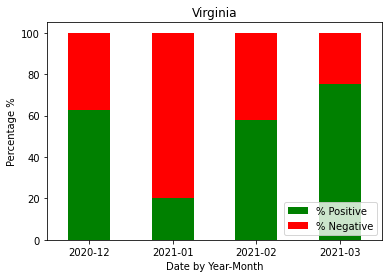

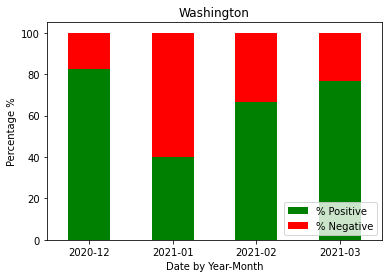

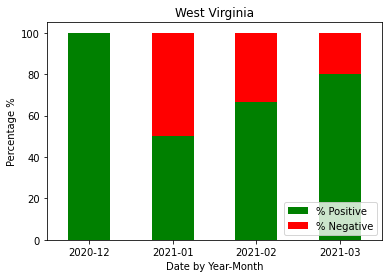

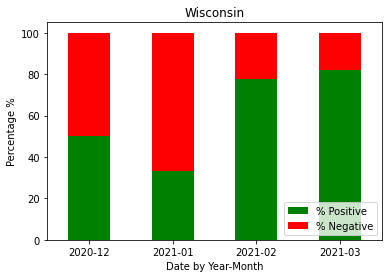

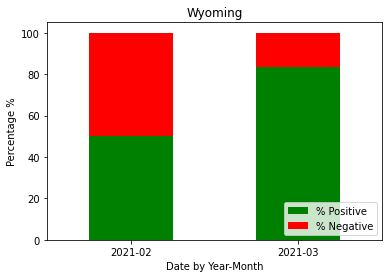

In [177]:
# Create stacked barcharts for all 50 states
for s in np.unique(df_grouped["state"]):
  stacked_bar(s)
  print()

In [318]:
# Create new column for to represent overall sentiment for each state
df_grouped["overall_sentiment"] = ""
df_grouped.loc[df_grouped["percent_positive"] > df_grouped["percent_negative"], "overall_sentiment"] = "Positive"
df_grouped.loc[df_grouped["percent_positive"] < df_grouped["percent_negative"], "overall_sentiment"] = "Negative"
df_grouped.loc[df_grouped["percent_positive"] == df_grouped["percent_negative"], "overall_sentiment"] = "Neutral"
df_grouped

,state,date,percent_positive,percent_negative,overall_sentiment
0,Alabama,2020-12,75.000000,25.000000,Positive
1,Alabama,2021-01,100.000000,0.000000,Positive
2,Alabama,2021-02,63.636364,36.363636,Positive
3,Alabama,2021-03,63.888889,36.111111,Positive
4,Alaska,2021-01,100.000000,0.000000,Positive
...,...,...,...,...,...
180,Wisconsin,2021-01,33.333333,66.666667,Negative
181,Wisconsin,2021-02,77.777778,22.222222,Positive
182,Wisconsin,2021-03,81.818182,18.181818,Positive
183,Wyoming,2021-02,50.000000,50.000000,Neutral


In [319]:
# Get majority overall sentiment for each state
df_grouped = df_grouped.groupby("state")["overall_sentiment"].value_counts().to_frame(name = "count").reset_index().sort_values(by=["state","count"], ascending = [True, False])
df_grouped = df_grouped.groupby(["state"], as_index = False).first()[["state","overall_sentiment"]]
df_grouped

,state,overall_sentiment
0,Alabama,Positive
1,Alaska,Positive
2,Arizona,Positive
3,Arkansas,Positive
4,California,Positive
...,...,...
45,Virginia,Positive
46,Washington,Positive
47,West Virginia,Positive
48,Wisconsin,Positive


In [320]:
# Set no. of rows displayed
pd.set_option("display.max_rows", None)

# Add numerical column to represent overall_sentiment
df_grouped["sentiment_val"] = 1
df_grouped.loc[df_grouped["overall_sentiment"] == "Negative", "sentiment_val"] = -1
df_grouped.loc[df_grouped["overall_sentiment"] == "Neutral", "sentiment_val"] = 0
df_grouped

,state,overall_sentiment,sentiment_val
0,Alabama,Positive,1
1,Alaska,Positive,1
2,Arizona,Positive,1
3,Arkansas,Positive,1
4,California,Positive,1
5,Colorado,Positive,1
6,Connecticut,Positive,1
7,Delaware,Positive,1
8,Florida,Positive,1
9,Georgia,Positive,1


In [321]:
# df_new = df_grouped.groupby("state", as_index = False).mean()
# df_new

In [324]:
import plotly.express as px

fig = px.choropleth(df_grouped, 
                    locations = list(us_states["id"]),
                    locationmode = "USA-states",
                    color = "sentiment_val",
                    color_continuous_scale = ["red","green"],
                    range_color = [-1,1],
                    scope = "usa",
                    )
fig.show()

In [325]:
# Group by state and date then convert back to DataFrame Object
df_new2 = df_predictions.groupby(["state","date"])["prediction"].value_counts().to_frame(name = 'count').reset_index()

# Cast rows into columns
df_new2["count_positive"] = 0
df_new2["count_negative"] = 0
df_new2.loc[df_new2["prediction"] == "positive", "count_positive"] = df_new2.loc[df_new2["prediction"] == "positive", "count"]
df_new2.loc[df_new2["prediction"] == "negative", "count_negative"] = df_new2.loc[df_new2["prediction"] == "negative", "count"]
df_new2 = df_new2.groupby(["state","date"]).sum().reset_index()[["state","date","count_positive","count_negative"]]

# Get total counts
df_new2 = df_new2.groupby(["state"], as_index = False).sum()

# Calculate percentage positive
df_new2["percent_positive"] = df_new2["count_positive"]/(df_new2["count_positive"]+df_new2["count_negative"])*100
df_new2["percent_negative"] = df_new2["count_negative"]/(df_new2["count_positive"]+df_new2["count_negative"])*100
df_new2

,state,count_positive,count_negative,percent_positive,percent_negative
0,Alabama,35,18,66.037736,33.962264
1,Alaska,18,6,75.000000,25.000000
2,Arizona,86,41,67.716535,32.283465
3,Arkansas,23,6,79.310345,20.689655
4,California,803,367,68.632479,31.367521
5,Colorado,98,34,74.242424,25.757576
6,Connecticut,65,25,72.222222,27.777778
7,Delaware,10,8,55.555556,44.444444
8,Florida,289,114,71.712159,28.287841
9,Georgia,139,63,68.811881,31.188119


In [332]:
import plotly.express as px

fig = px.choropleth(df_new2, 
                    locations = list(us_states["id"]),
                    locationmode = "USA-states",
                    color = "percent_positive",
                    color_continuous_scale = ["white","#006400"],
                    range_color = [0,100],
                    scope = "usa",
                    )
fig.show()